# Travel Sales Person

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_cities =20
cross_rate = 0.1
mutate_rate = 0.02
pop_size = 500
n_generations = 500

In [3]:
np.random.rand(n_cities, 2)

array([[ 0.21854078,  0.08260805],
       [ 0.13790497,  0.33406119],
       [ 0.81481054,  0.76407159],
       [ 0.64442058,  0.78360797],
       [ 0.63448347,  0.26041862],
       [ 0.19189404,  0.36122758],
       [ 0.40398525,  0.94995857],
       [ 0.64791788,  0.09824124],
       [ 0.37409576,  0.7855509 ],
       [ 0.40796982,  0.77243517],
       [ 0.08893094,  0.99187203],
       [ 0.17175973,  0.50692332],
       [ 0.79232279,  0.44266618],
       [ 0.01285841,  0.47759331],
       [ 0.96375427,  0.6856589 ],
       [ 0.67528436,  0.3639831 ],
       [ 0.86253542,  0.42401409],
       [ 0.85944791,  0.87623466],
       [ 0.83646144,  0.6196758 ],
       [ 0.42138971,  0.77252809]])

In [7]:
class TravelSalesPerson():
    def __init__(self, n_cities):
        self.city_position = np.random.rand(n_cities, 2)
        plt.ion()
    
    def plotting(self, lx, ly, total_d):
        plt.cla()
        plt.scatter(self.city_position[:, 0].T, self.city_position[:, 1].T, s=100, c='k')
        plt.plot(lx.T, ly.T, 'r-')
        plt.text(-0.05, -0.05, 'Total distance=%.2f' % total_d, fontdict={'size': 20, 'color': 'red'})
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1,1)
        plt.pause(0.01)

In [5]:
class GA():
    def __init__(self, DNA_size, cross_rate, mutate_rate, pop_size):
        self.DNA_size = DNA_size
        self.cross_rate = cross_rate
        self.mutate_rate = mutate_rate
        self.pop_size = pop_size
        
        self.pop = np.vstack([np.random.permutation(DNA_size) for _ in range(pop_size)])
        
    def translateDNA(self, DNA, city_position):          # n_cities * 2
        line_x = np.empty_like(DNA, dtype=np.float64)    # pop_size * n_cities
        line_y = np.empty_like(DNA, dtype=np.float64)    # pop_size * n_cities
        for i, d in enumerate(DNA):
            city_coord = city_position[d]                # 1 * 2
            line_x[i, :] = city_coord[:, 0]
            line_y[i, :] = city_coord[:, 1]
            
        return line_x, line_y
    
    def get_fitness(self, line_x, line_y):
        total_distance = np.empty((line_x.shape[0],), dtype=np.float64)
        for i, (xs, ys) in enumerate(zip(line_x, line_y)):
            total_distance[i] = np.sum(np.sqrt(np.square(np.diff(xs)) + np.square(np.diff(ys))))
        fitness = np.exp(self.DNA_size * 2 / total_distance)
        return fitness, total_distance
    
    def select(self, fitness):
        idx = np.random.choice(np.arange(pop_size), size=self.pop_size, replace=True, p=fitness / fitness.sum())
        return self.pop[idx]
    
    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)
            cross_point = np.random.randint(0, 2, self.DNA_size).astype(np.bool)
            keep_city = parent[~cross_point]
            swap_city = pop[i_, np.isin(pop[i_].ravel(), keep_city, invert=True)]
            parent[:] = np.concatenate((keep_city, swap_city))
        return parent
    
    def mutate(self, child):
        for point in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                swap_point = np.random.randint(0, self.DNA_size)
                swapA, swapB = child[point], child[swap_point]
                child[point], child[swap_point] = swapB, swapA
        return child

    def evolve(self, fitness):
        pop = self.select(fitness)
        pop_copy = pop.copy()
        for parent in pop:  # for every parent
            child = self.crossover(parent, pop_copy)
            child = self.mutate(child)
            parent[:] = child
        self.pop = pop

Gen: 0 | best fit: 597.86
Gen: 1 | best fit: 597.86
Gen: 2 | best fit: 616.52
Gen: 3 | best fit: 730.39
Gen: 4 | best fit: 784.00
Gen: 5 | best fit: 1209.61
Gen: 6 | best fit: 1209.61
Gen: 7 | best fit: 1727.76
Gen: 8 | best fit: 1727.76
Gen: 9 | best fit: 1727.76
Gen: 10 | best fit: 1727.76
Gen: 11 | best fit: 3091.35
Gen: 12 | best fit: 3453.29
Gen: 13 | best fit: 3453.29
Gen: 14 | best fit: 3453.29
Gen: 15 | best fit: 3453.29
Gen: 16 | best fit: 3453.29
Gen: 17 | best fit: 3613.96
Gen: 18 | best fit: 3720.91
Gen: 19 | best fit: 3720.91
Gen: 20 | best fit: 3778.38
Gen: 21 | best fit: 5104.67
Gen: 22 | best fit: 5104.67
Gen: 23 | best fit: 5104.67
Gen: 24 | best fit: 5104.67
Gen: 25 | best fit: 5104.67
Gen: 26 | best fit: 5104.67
Gen: 27 | best fit: 5104.67
Gen: 28 | best fit: 5104.67
Gen: 29 | best fit: 5104.67
Gen: 30 | best fit: 5104.67
Gen: 31 | best fit: 5104.67
Gen: 32 | best fit: 5104.67
Gen: 33 | best fit: 5139.08
Gen: 34 | best fit: 5139.08
Gen: 35 | best fit: 5139.08
Gen: 36

Gen: 280 | best fit: 27136.43
Gen: 281 | best fit: 27136.43
Gen: 282 | best fit: 27136.43
Gen: 283 | best fit: 27136.43
Gen: 284 | best fit: 27136.43
Gen: 285 | best fit: 27136.43
Gen: 286 | best fit: 27136.43
Gen: 287 | best fit: 27136.43
Gen: 288 | best fit: 27136.43
Gen: 289 | best fit: 27136.43
Gen: 290 | best fit: 27136.43
Gen: 291 | best fit: 27136.43
Gen: 292 | best fit: 27136.43
Gen: 293 | best fit: 27136.43
Gen: 294 | best fit: 27136.43
Gen: 295 | best fit: 27136.43
Gen: 296 | best fit: 27136.43
Gen: 297 | best fit: 27136.43
Gen: 298 | best fit: 27136.43
Gen: 299 | best fit: 27136.43
Gen: 300 | best fit: 27136.43
Gen: 301 | best fit: 27136.43
Gen: 302 | best fit: 27136.43
Gen: 303 | best fit: 27136.43
Gen: 304 | best fit: 27136.43
Gen: 305 | best fit: 27136.43
Gen: 306 | best fit: 27136.43
Gen: 307 | best fit: 27136.43
Gen: 308 | best fit: 27136.43
Gen: 309 | best fit: 27136.43
Gen: 310 | best fit: 27136.43
Gen: 311 | best fit: 27136.43
Gen: 312 | best fit: 27136.43
Gen: 313 |

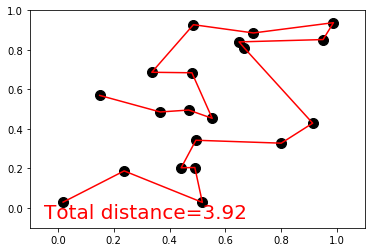

In [8]:
ga = GA(DNA_size=n_cities, cross_rate=cross_rate, mutate_rate=mutate_rate, pop_size=pop_size)

env = TravelSalesPerson(n_cities)
for generation in range(n_generations):
    lx, ly = ga.translateDNA(ga.pop, env.city_position)
    fitness, total_distance = ga.get_fitness(lx, ly)
    ga.evolve(fitness)
    best_idx = np.argmax(fitness)
    print('Gen:', generation, '| best fit: %.2f' % fitness[best_idx],)

    env.plotting(lx[best_idx], ly[best_idx], total_distance[best_idx])

plt.ioff()
plt.show()